###mnist, fmnist, cifar10 순으로 간단한 CNN 모델의 성능(정확도)이 낮아지는 이유

Mnist는 CNN을 1 layer만 쌓아도 정확도가 98 ~ 99%가 달성이 되는 아주 기본적인 데이터 셋 (숫자 0 ~ 9 분류)

Fmnist는 mnist보다 분류가 더 까다로우며 CNN을 통해 정확도 90 ~ 95%인 결과 달성 가능 (숫자 0 ~ 9를 클래스 레이블에 매핑)

0 : 티셔츠 /
1 : 바지 /
2 : 풀오버 /
3 : 드레스 /
4 : 코트 /
5 : 샌들 /
6 : 셔츠 /
7 : 운동화 /
8 : 가방 /
9 : 부츠

Cifar10은 10개의 대분류 labeling data > 10개의 소분류 (총 100개의 label)

Mnist는 흑백 데이터이지만, Cifar는 컬러 데이터로 RGB라는 3개의 채널이 있음


In [1]:
# ResNet-50
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
print(tf.__version__)

2.3.0


In [2]:
# ResNet-101
from tensorflow.keras.applications.resnet import ResNet101

In [3]:
# ResNet-152
from tensorflow.keras.applications.resnet import ResNet152

In [4]:
# conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))  # resnet50
# conv_base = ResNet101(weights='imagenet', include_top=False, input_shape=(200, 200, 3)) # resnet101
conv_base = ResNet152(weights='imagenet', include_top=False, input_shape=(200, 200, 3)) # resnet152

234700800/234698864 [==============================] - 9s 0us/step


In [5]:
#Freeze all Layers of ResNET
conv_base.trainable = False

In [6]:
conv_base.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

# model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras import layers, models, callbacks

In [10]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_resnet152_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)

In [11]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, 
                    callbacks=[cp_callback], 
                    validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - 1123s 1s/step - loss: 1.9292 - accuracy: 0.3116 - val_loss: 1.4922 - val_accuracy: 0.4722
Epoch 2/20
782/782 [==============================] - 1120s 1s/step - loss: 1.5967 - accuracy: 0.4314 - val_loss: 1.3566 - val_accuracy: 0.5301
Epoch 3/20
782/782 [==============================] - 1114s 1s/step - loss: 1.4998 - accuracy: 0.4695 - val_loss: 1.2886 - val_accuracy: 0.5491
Epoch 4/20
782/782 [==============================] - 1118s 1s/step - loss: 1.4503 - accuracy: 0.4899 - val_loss: 1.2507 - val_accuracy: 0.5566
Epoch 5/20
782/782 [==============================] - 1127s 1s/step - loss: 1.3969 - accuracy: 0.5127 - val_loss: 1.2417 - val_accuracy: 0.5684
Epoch 6/20
782/782 [==============================] - 1126s 1s/step - loss: 1.3529 - accuracy: 0.5291 - val_loss: 1.2214 - val_accuracy: 0.5664
Epoch 7/20
782/782 [==============================] - 1128s 1s/step - loss: 1.3385 - accuracy: 0.5338 - val_loss: 1.2233 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'center bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


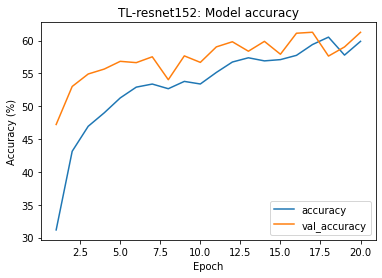

In [12]:
epochs = 20

acc_list = [100 * i for i in history.history['accuracy']]
vacc_list = [100 * i for i in history.history['val_accuracy']]
loss_list = history.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = history.history['val_loss'] #[100 * i for i in history.history['val_loss']]


plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('TL-resnet152: Model accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center bottom')
# plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


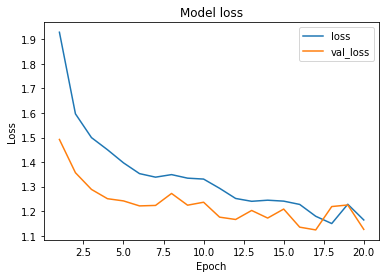

In [13]:
# loss vs. val_loss
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),vloss_list) 
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='top right')

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 203s 647ms/step - loss: 1.1257 - accuracy: 0.6126


[1.1257116794586182, 0.6126000285148621]

In [15]:
model.save('cifar10_best.hdf5')
# del model
model = tf.keras.models.load_model('cifar10_best.hdf5')

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 203s 647ms/step - loss: 1.1257 - accuracy: 0.6126


[1.1257116794586182, 0.6126000285148621]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 256, 256, 3)       0         
_________________________________________________________________
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 131072)            524288    
_________________________________________________________________
dense (Dense)                (None, 128)               1

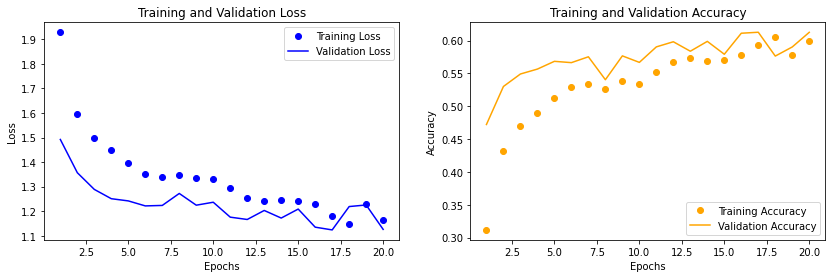

In [18]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

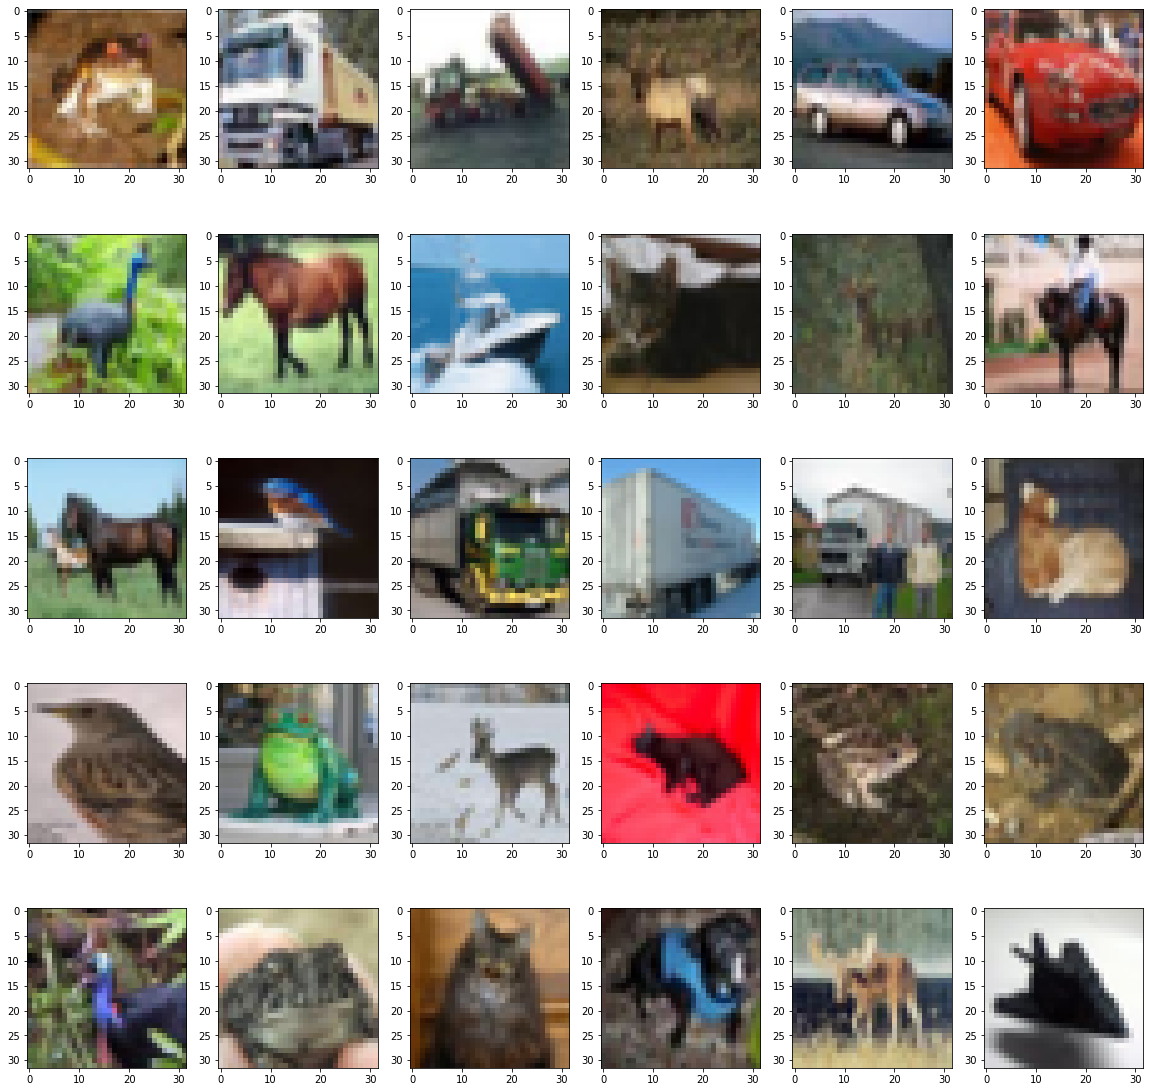

In [19]:
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(x_train[i])

In [20]:
layer_outputs = [layer.output for layer in conv_base.layers[2:8]]

activation_model = models.Model(inputs=conv_base.input, outputs=layer_outputs)

In [21]:
img = x_train[29]
# img = Image.fromarray(img, 'RGB')
# img.save('outfile.jpg')
# cv2.imwrite('myImage.png',img)

# img = image.load_img('outfile.jpg', target_size=(200, 200))
# img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img, axis=0)
img_tensor /= 255.

In [22]:
activations = activation_model.predict(img_tensor)

In [23]:
first_layer_activation = activations[0]

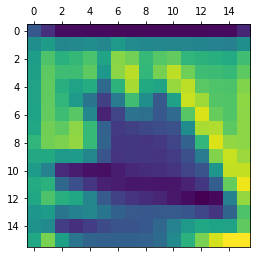

In [24]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()

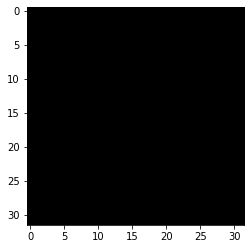

In [25]:
plt.figure()
plt.imshow(x_train[29])